Car Price Prediction using Machine Learning Algorithms                           
Data set features
1. Car Brand
2. Year
3. Sold Price
4. Present Price
5. KMS Driven
6. Fuel Type
7. Seller Type
8. Transmission Type
9. Owners

Work Flow :

- Gathering Dataset and Understanding data

- Data Preprocessing

- Splitting the data in Training data and Testing data

- Model Building

- Training Model

- Feeding new data to model

- Predicting Output

Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

Data collection and processing

In [ ]:
#Loading data from csv file to dataframe
car_df = pd.read_csv('/content/car data.csv')

In [ ]:
#Checking first 5 rows of dataframe
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Checking number of columns and rows of dataset
car_df.shape

(301, 9)

In [ ]:
#Checking information about dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#Checking for null values
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#Checking values of categrical columns
print(car_df.Fuel_Type.value_counts())
print(car_df.Seller_Type.value_counts())
print(car_df.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


Fuel Type :
* Petrol
*   Diesel
*   CNG  

Seller Type :
*   Dealer
*   Individual

Transmission Type :
*   Manual
*   Automatic
                                         

Encoding Categorical Data

In [ ]:
labelencoder = LabelEncoder()

#Encoding 'Fuel_Type' Column
car_df.iloc[:,5] = labelencoder.fit_transform(car_df.iloc[:,5])

#Encoding 'Seller_Type' Column
car_df.iloc[:,6] = labelencoder.fit_transform(car_df.iloc[:,6])

#Encoding 'Transmission' Column
car_df.iloc[:,7] = labelencoder.fit_transform(car_df.iloc[:,7])

In [ ]:
car_df

Splitting data in Target

In [ ]:
x = car_df.drop(['Car_Name','Selling_Price'],axis=1)
y = car_df['Selling_Price']

In [ ]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Splitting data in Training data and Testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

Model Training

Linear Regression

In [ ]:
lreg_model = LinearRegression()
lreg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
#Prediction on training data
training_data_prediction = lreg_model.predict(x_train)

In [ ]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('Error Scored: ',error_score)

Error Scored:  0.8800594535535698


In [ ]:
compare_df = pd.DataFrame({'Actual Value':y_train,"Predicted Value":training_data_prediction})
compare_df

,Actual Value,Predicted Value
102,1.65,2.944578
80,14.73,9.253674
245,5.20,4.886507
163,0.45,0.103651
131,0.75,1.725802
...,...,...
203,2.95,2.178284
255,3.00,2.891323
72,7.45,10.016325
235,9.10,6.802436


Visualizing actual price and predicted price

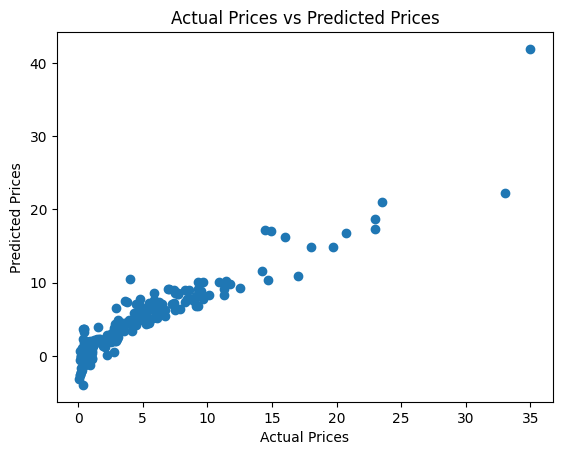

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
#Prediction on test data
test_data_prediction = lreg_model.predict(x_test)

In [ ]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('Error Scored: ',error_score)

Error Scored:  0.8484549412088829


In [ ]:
compare_df = pd.DataFrame({'Actual Value':y_test,"Predicted Value":test_data_prediction})
compare_df

,Actual Value,Predicted Value
285,7.40,6.011749
248,4.00,2.950066
150,0.50,0.470799
217,3.15,3.922641
107,1.25,1.431313
...,...,...
62,18.75,19.145669
154,0.50,1.476000
218,6.45,5.670217
286,5.65,5.638272


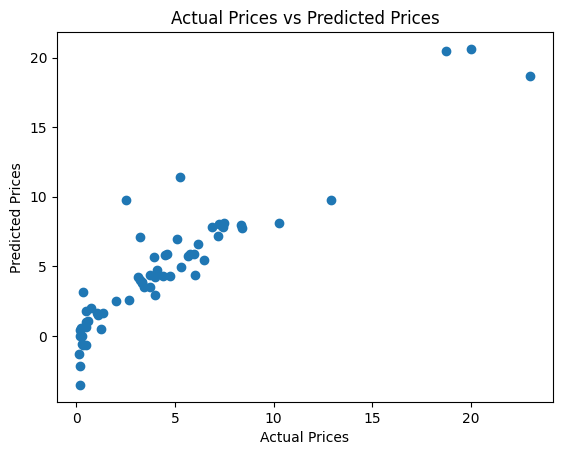

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Lasso Regression

In [ ]:
lasso_reg_model = Lasso()
lasso_reg_model.fit(x_train,y_train)

Lasso()

Model Evaluation

In [ ]:
#Prediction on training data
training_data_prediction = lasso_reg_model.predict(x_train)

In [ ]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('Error Scored: ',error_score)

Error Scored:  0.8416309679582044


In [ ]:
compare_df = pd.DataFrame({'Actual Value':y_train,"Predicted Value":training_data_prediction})
compare_df

,Actual Value,Predicted Value
102,1.65,2.944578
80,14.73,9.253674
245,5.20,4.886507
163,0.45,0.103651
131,0.75,1.725802
...,...,...
203,2.95,2.178284
255,3.00,2.891323
72,7.45,10.016325
235,9.10,6.802436


Visualizing actual price and predicted price

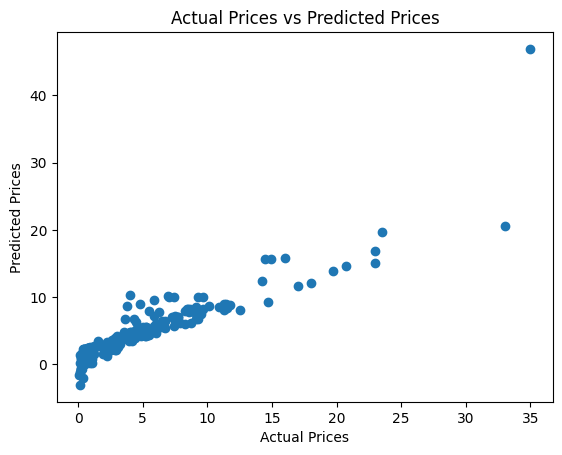

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
#Prediction on test data
test_data_prediction = lasso_reg_model.predict(x_test)

In [ ]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('Error Scored: ',error_score)

Error Scored:  0.8544755211923214


In [ ]:
compare_df = pd.DataFrame({'Actual Value':y_test,"Predicted Value":test_data_prediction})
compare_df

,Actual Value,Predicted Value
285,7.40,6.011749
248,4.00,2.950066
150,0.50,0.470799
217,3.15,3.922641
107,1.25,1.431313
...,...,...
62,18.75,19.145669
154,0.50,1.476000
218,6.45,5.670217
286,5.65,5.638272


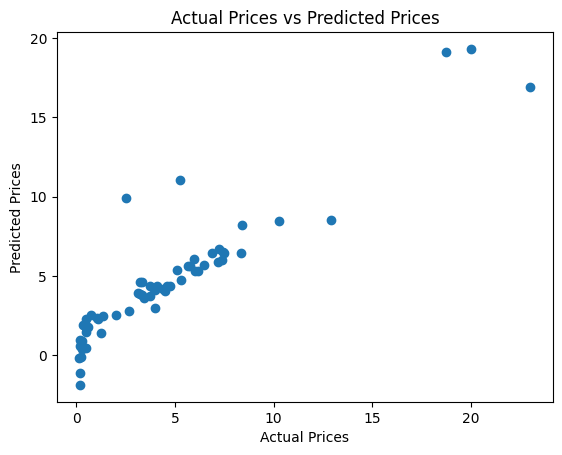

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()